

## Metadata


 This dataset contains 5,000 [Electrocardiograms] each with 140 data points.We are using a simplified version of the dataset, where each example has been labeled either `0` (corresponding to an abnormal rhythm), or `1` (corresponding to a normal rhythm). 
 
We are interested in finding the abnormal rhythms.




Q2- Train an autoencoder to detect anomalies using the ECG5000 dataset. 

Plot and observe a normal ECG vs an anomalous ECG.

Design and Train an autoencoder on the normal rhythms only, then use it to reconstruct all the data.

The autoencoder is trained using only the normal ECGs, but is evaluated using the full test set. 

Classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples. 

In [1]:
#importing libraries for visualization
import matplotlib.pyplot as plt

#importing libraries for data cleaning,analysis and computations
import numpy as np
import pandas as pd

#importing libraries for model training
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

#importing libraries for statistical tools
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


In [2]:
#load the dataset
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
og_data = df.values
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [3]:
#The last element contains the labels
labels = og_data[:, -1]

#The other data points are the electrocadriogram data
data = og_data[:, 0:-1]

#Splitting the dataset
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=21)

In [4]:
#Normalizing the data
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [5]:
#Dividing the data into normal and anomalous categories
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

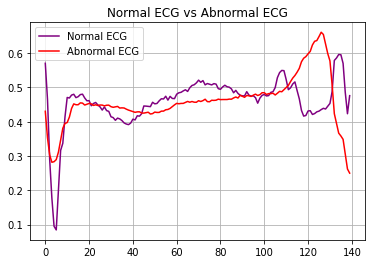

In [6]:
#Plotting of Normal vs Abnormal ECG
plt.grid()
plt.plot(np.arange(140), normal_train_data[0],label="Normal ECG",color="purple")
plt.plot(np.arange(140), anomalous_train_data[0],label="Abnormal ECG",color="red")
plt.title("Normal ECG vs Abnormal ECG")
plt.legend()
plt.show()

In [7]:
#Building the model

class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    #Encoder
    self.encoder = tf.keras.Sequential([layers.Dense(32, activation="relu"),layers.Dense(16, activation="relu"),layers.Dense(8, activation="relu")])
    #Decoder
    self.decoder = tf.keras.Sequential([layers.Dense(16, activation="relu"),layers.Dense(32, activation="relu"),layers.Dense(140, activation="sigmoid")])
   #Defining the call function 
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [8]:
#compiling the model
autoencoder.compile(optimizer='adam', loss='mae')

In [9]:
#fitting the data to the model
history = autoencoder.fit(normal_train_data, normal_train_data, epochs=20, batch_size=540,validation_data=(test_data, test_data),shuffle=True)

Epoch 1/20
5/5 [==============================] - 4s 78ms/step - loss: 0.0583 - val_loss: 0.0536
Epoch 2/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0566 - val_loss: 0.0522
Epoch 3/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0544 - val_loss: 0.0505
Epoch 4/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0513 - val_loss: 0.0487
Epoch 5/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0475 - val_loss: 0.0470
Epoch 6/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0437 - val_loss: 0.0447
Epoch 7/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0401 - val_loss: 0.0428
Epoch 8/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0369 - val_loss: 0.0415
Epoch 9/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0343 - val_loss: 0.0406
Epoch 10/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0320 - val_loss: 0.0396
Epoch 11/20
5/5 [============

In [10]:
#Displaying the summary of the encoder
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                4512      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
Total params: 5,176
Trainable params: 5,176
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Displaying the summary of the decoder
autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 140)               4620      
                                                                 
Total params: 5,308
Trainable params: 5,308
Non-trainable params: 0
_________________________________________________________________


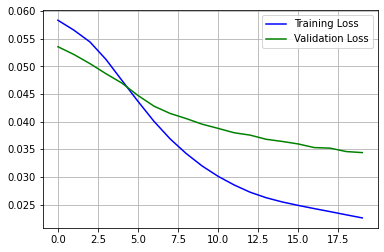

In [12]:
#Plotting training Vs validation loss
plt.grid()
plt.plot(history.history["loss"], label="Training Loss",color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss",color="green")
plt.legend()

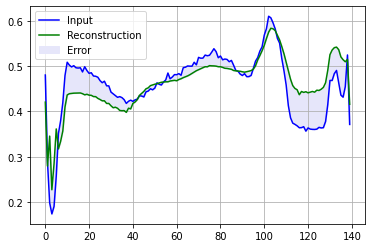

In [13]:
#Visualizing the error for normal test data
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.grid()
plt.plot(normal_test_data[0],color='blue')
plt.plot(decoded_data[0],color='green')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lavender')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

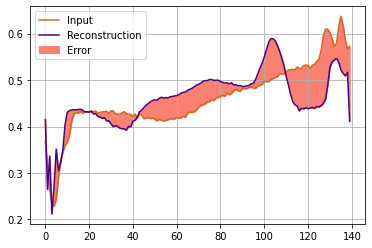

In [14]:
#Visualizing the error for Anomalous test data
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.grid()
plt.plot(anomalous_test_data[0],color='chocolate')
plt.plot(decoded_data[0],color='indigo')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='salmon')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

74/74 [==============================] - 0s 4ms/step


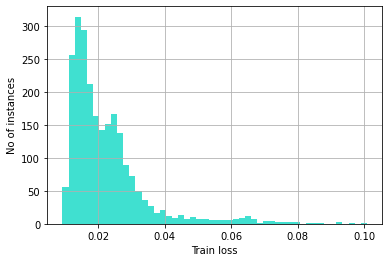

In [15]:
#Plotting the reconstruction error on normal ECGs from the training set
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.grid()
plt.hist(train_loss[None,:], bins=50,color="turquoise")
plt.xlabel("Train loss")
plt.ylabel("No of instances")
plt.show()

14/14 [==============================] - 0s 4ms/step


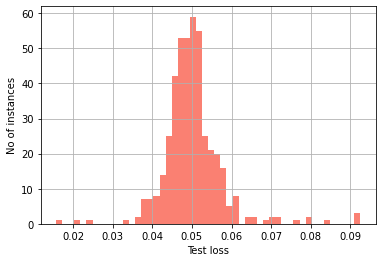

In [16]:
#Plotting the reconstruction error on Anomalous ECGs from the testing set
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.grid()
plt.hist(test_loss[None, :], bins=50,color="salmon")
plt.xlabel("Test loss")
plt.ylabel("No of instances")
plt.show()

In [17]:
#Determine a threshold value that is one standard deviations away from the mean.
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.03423031


In [18]:
#Classifying an ECG as an anomaly if the reconstruction error is greater than the threshold specified
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [19]:
#Predictions and evaluation metrics
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.943
Precision = 0.9921722113502935
Recall = 0.9053571428571429
